## step1:导入函数工具箱

In [2]:
##基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display,clear_output
import time

In [3]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
##模型预测
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [5]:
##数据降维处理
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

In [7]:
import lightgbm as lgb
import xgboost as xgb

In [8]:
##参数搜索和评价
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## step2:数据提取

In [14]:
##通过pandas对数据进行读取
train_data=pd.read_csv('C:\\Users\\Nicolas\\Documents\\used_car_train_20200313\\used_car_train_20200313.csv',sep=' ')
test_data=pd.read_csv('C:\\Users\\Nicolas\\Documents\\used_car_testA_20200313\\used_car_testA_20200313.csv',sep=' ')

In [15]:
##输出数据大小信息
print('train_data:',train_data.shape)
print('test_data:',test_data.shape)

train_data: (150000, 31)
test_data: (50000, 30)


In [16]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [24]:
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

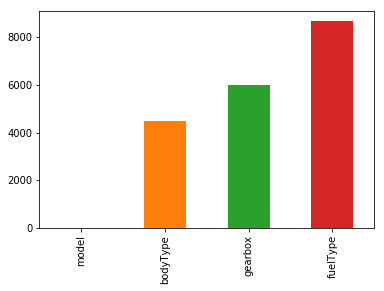

In [25]:
##缺失值列可视化
missing=train_data.isnull().sum()
missing1=missing[missing>0]
missing1.sort_values(inplace=True)
missing1.plot.bar()

In [33]:
##对notRepairedDamage进行转化
train_data['notRepairedDamage'].replace('-',np.nan,inplace=True)

In [29]:
##异常值筛选
for col in train_data.columns:
    print(col+"的特征分布如下：")
    print(train_data[col].value_counts())

SaleID的特征分布如下：
2047      1
113949    1
15661     1
13612     1
3371      1
1322      1
7465      1
5416      1
27943     1
25894     1
32037     1
29988     1
19747     1
17698     1
23841     1
21792     1
109855    1
9518      1
11567     1
54576     1
40249     1
44351     1
42302     1
48445     1
46396     1
36155     1
34106     1
38200     1
56625     1
60727     1
         ..
39622     1
33477     1
35524     1
47810     1
62155     1
41665     1
43712     1
148125    1
135831    1
137878    1
131733    1
64202     1
51916     1
19164     1
725       1
29403     1
31450     1
25305     1
27352     1
4823      1
6870      1
2772      1
49869     1
13011     1
15058     1
8913      1
10960     1
53967     1
56014     1
0         1
Name: SaleID, Length: 150000, dtype: int64
name的特征分布如下：
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
8

-3.245133    20
 3.183323    16
 1.942732    15
 3.354949    15
 2.796739    15
 3.116688    15
 2.886858    14
 3.396244    14
 3.195363    14
 3.400295    12
 3.196137    12
-3.276149    11
 2.942478    11
 3.286442    11
 3.886811    11
 3.689488    11
 3.790849    10
 3.312380    10
 3.621191    10
 4.401306    10
-3.274868    10
 3.540994    10
 3.678694    10
 3.554861     9
 3.558752     9
 3.931098     9
-3.233905     9
 3.476742     9
-3.212543     9
 3.555961     8
             ..
-3.280657     1
 3.592148     1
-3.240434     1
 4.374652     1
 4.426121     1
-3.165139     1
-3.312615     1
 3.696081     1
 2.991618     1
 5.799775     1
-3.209732     1
-3.283163     1
-2.960679     1
 0.655802     1
 5.232964     1
 5.184979     1
-3.216072     1
-3.111052     1
 5.220566     1
 4.335679     1
 0.865471     1
-3.338176     1
 5.309824     1
 3.811175     1
 2.991164     1
 3.418050     1
-2.994782     1
-3.022811     1
-3.220458     1
-3.309574     1
Name: v_1, Length: 14399

0.000000    3486
0.014867      20
0.082765      16
0.101150      15
0.051535      15
0.045877      15
0.046765      15
0.049611      14
0.048203      14
0.110887      14
0.049351      12
0.101553      12
0.097584      11
0.051700      11
0.068842      11
0.126611      11
0.053952      11
0.125604      10
0.035969      10
0.043857      10
0.046122      10
0.075093      10
0.070500      10
0.087427      10
0.034042       9
0.061138       9
0.027598       9
0.145274       9
0.092350       9
0.061393       9
            ... 
0.024845       1
0.041220       1
0.049372       1
0.088486       1
0.158245       1
0.083452       1
0.019893       1
0.009610       1
0.061466       1
0.035637       1
0.037569       1
0.101576       1
0.108911       1
0.025725       1
0.077883       1
0.023675       1
0.058025       1
0.050549       1
0.072026       1
0.034553       1
0.028229       1
0.127818       1
0.081478       1
0.128725       1
0.129218       1
0.067019       1
0.030366       1
0.095158      

## step3:特征与标签构建

In [18]:
##提取数值类型特征列名
numerical_cols = train_data.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')


In [20]:
##提取非数值类型特征列名
categorical_cols = train_data.select_dtypes(include='object').columns
print(categorical_cols)

Index(['notRepairedDamage'], dtype='object')


In [30]:
##saleid，name,regdate,seller,offertype,createdate,regionCode
feature_cols = [col for col in numerical_cols if col not in ['SaleID','name','regDate','creatDate','price','regionCode','seller']]
print(feature_cols)

['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'power', 'kilometer', 'offerType', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']


In [32]:
##提取特征列，标签列构造训练样本和测试样本
X_data = train_data[feature_cols]
Y_data = train_data['price']

X_test = test_data[feature_cols]

print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)

X train shape: (150000, 23)
X test shape: (50000, 23)
